Here, we will be implementing a L - layered deep neural network for image classification of images over a dataset containing images of cats (labelled as 1 ) and non-cats (labelled as 0)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
from utils import *

y = 1. It's a cat picture.


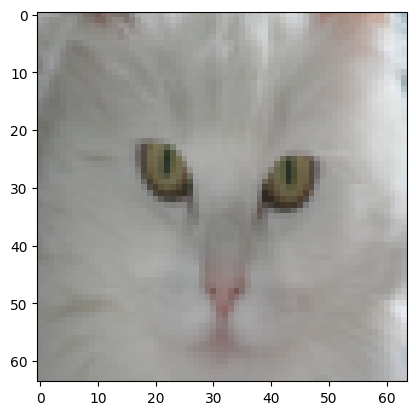

In [2]:
train_x_orig, train_y, test_x_orig, test_y, classes = load_data()
index = 50
plt.imshow(train_x_orig[index])
print ("y = " + str(train_y[0,index]) + ". It's a " + classes[train_y[0,index]].decode("utf-8") +  " picture.")

In [3]:
m_train = train_x_orig.shape[0]
num_px = train_x_orig.shape[1]
m_test = test_x_orig.shape[0]

print ("Number of training examples: " + str(m_train))
print ("Number of testing examples: " + str(m_test))
print ("Each image is of size: (" + str(num_px) + ", " + str(num_px) + ", 3)")
print ("train_x_orig shape: " + str(train_x_orig.shape))
print ("train_y shape: " + str(train_y.shape))
print ("test_x_orig shape: " + str(test_x_orig.shape))
print ("test_y shape: " + str(test_y.shape))

Number of training examples: 209
Number of testing examples: 50
Each image is of size: (64, 64, 3)
train_x_orig shape: (209, 64, 64, 3)
train_y shape: (1, 209)
test_x_orig shape: (50, 64, 64, 3)
test_y shape: (1, 50)


In [4]:
train_x_flatten = train_x_orig.reshape(train_x_orig.shape[0], -1).T 
test_x_flatten = test_x_orig.reshape(test_x_orig.shape[0], -1).T

train_x = train_x_flatten/255
test_x = test_x_flatten/255

print ("train_x's shape: " + str(train_x.shape))
print ("test_x's shape: " + str(test_x.shape))

train_x's shape: (12288, 209)
test_x's shape: (12288, 50)


In [7]:
def model(X, Y, layer_dims, alpha, iters):
    np.random.seed(1)
    costs = []
    parameters = initialize_parameters_deep(layer_dims)
    for i in range(iters):
        AL, caches = L_model_forward(X, parameters)
        cost = compute_cost(AL, Y)
        costs.append(cost)
        grads = L_model_backward(AL, Y, caches)
        parameters = update_parameters(parameters, grads, alpha)
        if i % 100 == 0:
            print ("Cost after iteration %i: %f" % (i, cost))
            
    plt.plot(np.squeeze(costs))
    plt.ylabel('cost')
    plt.xlabel('iterations (per hundreds)')
    plt.title("Learning rate =" + str(alpha))
    plt.show()
    
    return parameters

Cost after iteration 0: 0.686081
Cost after iteration 100: 0.592240
Cost after iteration 200: 0.532082
Cost after iteration 300: 0.483486
Cost after iteration 400: 0.441368
Cost after iteration 500: 0.408024
Cost after iteration 600: 0.354159
Cost after iteration 700: 0.312522
Cost after iteration 800: 0.281767
Cost after iteration 900: 0.243012
Cost after iteration 1000: 0.186024
Cost after iteration 1100: 0.229645
Cost after iteration 1200: 0.186302
Cost after iteration 1300: 0.233088
Cost after iteration 1400: 0.042881
Cost after iteration 1500: 0.028130
Cost after iteration 1600: 0.020544
Cost after iteration 1700: 0.016082
Cost after iteration 1800: 0.013091
Cost after iteration 1900: 0.010907
Cost after iteration 2000: 0.009282
Cost after iteration 2100: 0.008024
Cost after iteration 2200: 0.007027
Cost after iteration 2300: 0.006225
Cost after iteration 2400: 0.005569


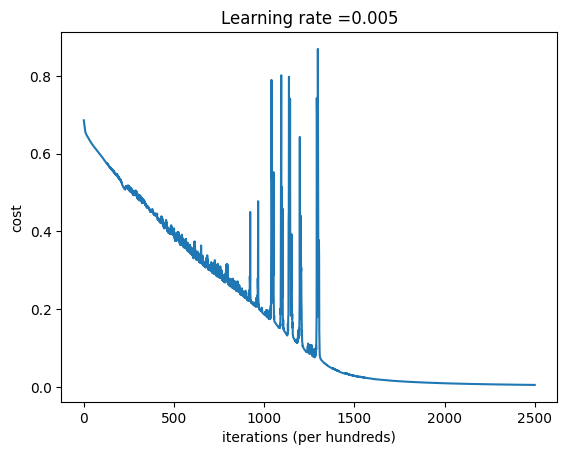

In [18]:
layer_dims = [12288, 20, 15, 10, 5, 1] # 5-layer model
parameters = model(train_x, train_y, layer_dims, 0.005, 2500)   

In [19]:
pred_train = predict(train_x, train_y, parameters)
pred_test = predict(test_x, test_y, parameters)

Accuracy: 0.9999999999999998
Accuracy: 0.68
